In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [4]:
class Board(object):
    """
    The environment for the reinforcement learning project.
    
    It should:
        - Have a matrix of size = NxN (which is basically N rows and N columns where N is a positive integer, greater than 0)
            - I have taken N as 3, but that is not necessary.
        - Initialize the matrix with zeroes.
            - The values in the matrix will be represented by integers: 0, 1, 2.
                - 0: empty cell represented by ' '.
                - 1: cell occupied by symbol 'O'.
                - 2: cell occupied by symbol 'X'.
            - 'X' or 'O' can be chosen by the player at initialization step by providing a choice in `player_sym`, defaults to 'x'
            - The other symbol will be chosen for the bot.
        - Have a property of winner, initialized by None.
        - Have a method to reset the board.
        - Have a method to represent the board in a human friendly form using 'X', 'O' and ' ' instead of the respective integers 2, 1, and 0.
        - Have a method which lets a user play by plotting a symbol of 'X' or 'O' only! anywhere within the matrix.
        - Calculates if there is a winner after each symbol is plotted. 
            - A win is defined by any row, column or diagonal being filled with the same symbol, with the symbol as the winner.
        - If there is a winner, prints a message for the same.
    """
    def __init__(self, n=3, player_sym='x'):
        """
        Constructor of the Board class, creates board objects.
        
        - n(default=3) int: The number of rows and columns in the tic-tac-toe board.
        - player_sym(default='x') str: The symbol chosen by a human player.
        """
        self.board = None
        self.reset_board(n)
        self.stale = False
        # Initalize the board

        self.sym_o = {
            'mark': 'O',
            'value': 1
        }
        # Setup the 'O' symbol

        self.sym_x = {
            'mark': 'X',
            'value': 2
        }
        # Setup the 'X' symbol

        self.sym_empty = {
            'mark': ' ',
            'value': 0
        }
        # Setup the default ' ' Symbol

        self.player_sym, self.bot_sym = (self.sym_x, self.sym_o) \
                                        if player_sym.lower() == 'x' \
                                        else (self.sym_o, self.sym_x)
        # Ensure different symbols are assigned to the bot and the player.

        self.winner = None
        # Initialize the winner as None

    def reset_board(self, n=3):
        """
        params:
        
        - n(default=3): int: The number of rows and columns in the tic-tac-toe board.
        Clear the board when the game is to be restarted or a new game has to be started.
        """
        self.board = np.zeros((n, n)).astype(int)
        self.winner = None
        
    def draw_char_for_item(self, item):
        """
        Returns the string mapping of the integers in the matrix 
        which can be understood by, but is not equal to: 
        {
            0: ' ',
            1: 'O',
            2: 'X'
        }
        (The exact mapping is present in the constructor)
        
        params:
        
        - item int: One of (1, 2, 0) representing the mark of the player, bot or empty.
        return: str
        """
        if item == self.sym_x.get('value'):
            # If item = 2 (value of symbol x, return mark of symbol x viz: 'X')
            return self.sym_x.get('mark')
        elif item == self.sym_o.get('value'):
            # If item = 1 (value of symbol o, return mark of symbol o viz: 'O')
            return self.sym_o.get('mark')
        else:
            # Otherwise the cell must be empty, as only 1, 2 have 'O','X' mapped onto them.
            return self.sym_empty.get('mark')

    def draw_board(self):
        """
        Prints a human friendly representation of the tic-tac-toe board
        """
        elements_in_board = self.board.size
        # Calculate the elements in the board

        items = [
            self.draw_char_for_item(self.board.item(item_idx)) 
            for item_idx in range(elements_in_board)
        ]
        # For each integer cell/element in the matrix, find the character mapped to it
        # and store in a list.
        board = """
             {} | {} | {}
            -----------
             {} | {} | {}
            -----------
             {} | {} | {}
        """.format(*items)
        # The *items expand to N arguments where N is the number of elements in `items`,
        # which is equal to the number of elements in the matrix, hence the string equivalent 
        # of the board
        print(board)
        
    def have_same_val(self, axis, item, item_x, item_y):
        """
        Oh boy! without the documentation this would be just 12-14 lines of code.
        
        Checks if a row(if axis = 0) of the board matrix has same values throughout.
                                    or
        Checks if a column(if axis = 1) of the board matrix has same values throughout.
        
        This is useful to check if a row or column is filled up by the symbol which was added the latest.
        
        params:
        
        - axis int: The direction along which operations are to be performed. Can have a value of 0 or 1 only.
            - 0 means row
            - 1 means column
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        max_limit, _ = self.board.shape
        # Get the number of rows in the board.

        result = True
        # Optimistic approach, assume the result to be true, 
        # unless proven wrong in the further steps.
        
        row_idx = col_idx = 0
        # set row_idx and col_idx iteration variables as 0
        # they don't get used much, they are present for code readability.

        main_idx, fixed_idx, ignore_idx = (col_idx, item_x, item_y) \
                                            if axis == 0 \
                                            else (row_idx, item_y, item_x)
        # main_idx: Update this index each iteration of the loop.
        # fixed_idx: Don't modify this index ever.
        # ignore_idx: this is the index of the inserted element 
        #              which doesn't need to be evaluated, so ignore.
        # The if-else ensures weather to increment the row index 
        # or the column index according to the value of the axis.
        
        while main_idx < max_limit:
            # If the main_idx which starts at 0 is less than number of rows/cols in matrix.
            if main_idx != ignore_idx:
                # And main_idx is not equal to the index of the latest item inserted (ignore_idx)
                # because for a fixed_index if we compare main_idx and ignore_idx it would give us the 
                # latest element added, which will be equal to itself.
                # Learning algorithms are costly, ain't nobady got time fo that!

                board_item = self.board[fixed_idx][main_idx] \
                    if axis == 0 \
                    else self.board[main_idx][fixed_idx]
                # find the item(board_item) in the matrix 
                # corresponding to main_idx and the fixed_index.
                # It should be an element in the same row or column depending on the axis.
                
                if board_item != item or board_item == 0:
                    # If the board_item found is not equal to the latest item added
                    # or if the board item is 0, which is still not marked by bot or player,
                    # result is false as the function didn't find all 
                    # values to be same across the row, or column.
                    # and exit the loop because a single-mismatch is sufficient 
                    # to confirm that all elements are not same.
                    result = False
                    break
            main_idx += 1
        return result
    
    def left_diagonal_has_same_values(self, item, item_x, item_y):
        """
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        i = j = 0
        # set i, j to 0
        
        result = True
        # Optimistic approach, assume the result to be true, 
        # unless proven wrong in the further steps.
        
        max_limit, _ = self.board.shape
        # Get the number of rows in the board.
        
        while i < max_limit:
            # The row index i is sufficient as i and j are incremented 
            # by same factor resulting in same values (Either would do)
            if i != item_x:
                # Avoid checking for the latest item added as that's what we are comparing with
                if self.board[i][j] != item or self.board[i][j] == 0:
                    # If the board_item found is not equal to the latest item added
                    # result is false as the function didn't find all 
                    # values to be same across the row, or column.
                    # and exit the loop because a single-mismatch is sufficient 
                    # to confirm that all elements are not same.
                    result = False
                    break
            i += 1
            j += 1
        return result

    def right_diagonal_has_same_values(self, item, item_x, item_y):
        """
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        result = True
        max_limit, _ = self.board.shape
        i = 0
        j = max_limit - 1
        while i < max_limit:
            # The row index i is sufficient as i and j are incremented 
            # by same factor resulting in same values (Either would do)
            if i != item_x:
                # Avoid checking for the latest item added as that's what we are comparing with
                if self.board[i][j] != item or self.board[i][j] == 0:
                    # If the board_item found is not equal to the latest item added
                    # result is false as the function didn't find all 
                    # values to be same across the row, or column.
                    # and exit the loop because a single-mismatch is sufficient 
                    # to confirm that all elements are not same.
                    result = False
                    break
            i += 1
            j -= 1
        return result

    def cols_have_same_values(self, item, item_x, item_y):
        """
        Check if any of the columns have same values
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        axis = 1
        return self.have_same_val(axis, item, item_x, item_y)

    def rows_have_same_values(self, item, item_x, item_y):
        """
        Check if any of the rows have same values
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        axis = 0
        return self.have_same_val(axis, item, item_x, item_y)
    
    def element_diagonal_has_same_value(self, item, item_x, item_y):
        """
        Check if any of the diagonals have same values
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        max_limit, _ = self.board.shape
        if item_x == item_y and item_x + item_y == max_limit - 1:
            return self.left_diagonal_has_same_values(item, item_x, item_y) or \
            self.right_diagonal_has_same_values(item, item_x, item_y)
        
        if item_x == item_y:
            # elements on the left diagonal have same row and column value.
            return self.left_diagonal_has_same_values(item, item_x, item_y)

        if item_x + item_y == max_limit - 1:
            # elements on the right diagonal have sum of the row and column value as the same number.
            return self.right_diagonal_has_same_values(item, item_x, item_y)
        # Else, it is not either of the diagonals
        return False
    
    def is_game_over(self, player, item, item_x, item_y):
        """
        Check if the game is over, which is defined by a row, column or diagonal having 
        the same values as the latest inserted integer `item`.
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        return self.cols_have_same_values(item, item_x, item_y) or \
                    self.rows_have_same_values(item, item_x, item_y) or \
                    self.element_diagonal_has_same_value(item, item_x, item_y)

    def is_winning_move(self, player, item, item_x, item_y):
        """
        Check if the last move was a winning move, which is defined by a row, column or diagonal having 
        the same values as the latest inserted integer `item`.
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        if self.is_game_over(player, item, item_x, item_y):
            self.winner = player
            return True
        return False
    
    def is_stale(self):
        """
        Checks if there is no vacant space on the board
        """
        x, y = np.where(self.board == 0)
        if len(x) == 0 and len(y) == 0:
            self.stale = True
        return self.stale
            
    
    def player_move(self, input_symbol, item_x, item_y):
        """
        The method which facilitates insertion of values into the board matrix.
        
        params:
        
        - input_symbol: 'X' or 'O'
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        """
        symbol = None
        
        if input_symbol == self.sym_o.get('mark'):
            # If 'O' was inserted
            symbol = self.sym_o
        
        elif input_symbol == self.sym_x.get('mark'):
            # If 'X' was inserted
            symbol = self.sym_x

        else:
            # invalid symbol
            return
        if self.board[item_x][item_y] == 0:
            self.board[item_x][item_y] = symbol.get('value')
            # insert the integer corresponding to the symbol in to the matrix.

            self.draw_board()
            # Show the board in a human friendly format for evaluation.

            if self.is_winning_move(symbol.get('mark'), symbol.get('value'), item_x, item_y):
                # If this move was a winning move, declare the symbol as the winner.
                print('Winner is: {}'.format(self.winner))
                return self.winner
            elif self.is_stale():
                print('Draw')
                return 'draw'
        
    def play(self, item_x, item_y):
        """
        The method exposed to a human user
        facilitates insertion of values into the board matrix.
        
        params:
        
        - input_symbol: 'X' or 'O'
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        """
        max_limit, _ = self.board.shape
        if item_x > max_limit - 1 or item_y > max_limit:
            # If the row, column values dont' exist in the board matrix. 
            # Exit without inserting it into the board.
            return
        self.player_move(self.player_sym.get('mark'), item_x, item_y)
        
    def bot_play(self, item_x, item_y):
        """
        The method exposed to a bot
        facilitates insertion of values into the board matrix.
        
        params:
        
        - input_symbol: 'X' or 'O'
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        """
        max_limit, _ = self.board.shape
        if item_x > max_limit - 1 or item_y > max_limit:
            return
        self.player_move(self.bot_sym.get('mark'), item_x, item_y)

In [5]:
class Agent(object):
    def __init__(self, exploration_rate=0.33, learning_rate=0.5, discount_factor=0.01):
        """
        An agent is a problem solver. 
        It should perform actions like:
            - plotting a symbol on the tic-tac-toe board if it is vacant.
            - Remember which states are more profitable than the others.
            - Explore better states
            - Exploit for maximum profit
        
        params:
        - exploration_rate: A floating point number < 1 
                which defines the agents probability to explore.
        - learning_rate: Used for assessing the value of intermediate 
                states during temporal difference learning.
        - discount_factor: The factor by which a reward must be reduced 
                to be passed on for intermediate states
        """
        self.states = {}
        # The list of states, a linear representation of the 3x3 tic tac toe board
        self.state_order = []
        # The order in which the agent progressed through states to be able to 
        # assign discounted rewards to older states.
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate

    @staticmethod
    def serialize_board(board):
        """
        convert the matrix 
        
            [
                [1, 2, 3],
                [4, 5, 6],
                [7, 8, 9],
            ]
            
            to the form: "123456789" i.e. flatten and stringify
        """
        serialized_board = board.flatten()
        return ''.join([str(i) for i in serialized_board.flatten().tolist()])

    def get_serious(self):
        """
        Quit exploring states and start exploiting
        Use this if you want to play with the agent.
        """
        self.exploration_rate = 0
    
    def learn_by_temporal_difference(self, reward, new_state_key, state_key):
        """
        Implementation of the temporal difference formula.
        https://en.wikipedia.org/wiki/Temporal_difference_learning
        https://detailed.af/reinforcement/
        """
        old_state = self.states.get(state_key, np.zeros((3,3)))
        return self.learning_rate * ((reward * self.states[new_state_key]) - old_state)

    def set_state(self, old_board, action):
        """
        Store the action performed for a given state
        """
        state_key = Agent.serialize_board(old_board)
        self.state_order.append((state_key, action))

    def on_reward(self, reward):
        """
        Assign rewards to actions performed on intermediate states.
        """
        if len(self.state_order) == 0:
            return None
        new_state_key, new_action = self.state_order.pop()
        # get the latest state and the action performed that led to the reward

        self.states[new_state_key] = np.zeros((3,3))
        # initialize the value with a zero matrix

        self.states[new_state_key].itemset(new_action, reward)
        # Assign the reward to this state
        
        while self.state_order:
            # while there is a stack of states (that were caused by actions performed)

            state_key, action = self.state_order.pop()
            # get the state and action performed on it
            
            reward *= self.discount_factor
            # Reduce the original reward (self.discount_factor is a number < 1)
            
            # Implementation of the value function
            if state_key in self.states:
                reward += self.learn_by_temporal_difference(reward, new_state_key, state_key).item(new_action)
                # If this state was encountered due to a different experiment, increase its previous value
                self.states[state_key].itemset(action, reward)
            else:
                self.states[state_key] = np.zeros((3,3))
                reward = self.learn_by_temporal_difference(reward, new_state_key, state_key).item(new_action)
                self.states[state_key].itemset(action, reward)
                # If this state was not encountered before, assign it the discounted reward as its value                
            new_state_key = state_key
            new_action = action
            
    def select_move(self, board):
        """
        Choose from exploration and exploitation.
        Epsilon greedy implementation for policy.
        http://home.deib.polimi.it/restelli/MyWebSite/pdf/rl5.pdf
        http://tokic.com/www/tokicm/publikationen/papers/AdaptiveEpsilonGreedyExploration.pdf
        """
        state_key = Agent.serialize_board(board)
        exploration = np.random.random() < self.exploration_rate
        print('explore' if exploration or state_key not in self.states else 'exploit')
        action = self.explore_board(board) \
                    if exploration or state_key not in self.states \
                    else self.exploit_board(state_key)
        print(action)
        self.set_state(board, action)
        return action

    def explore_board(self, board):
        """
        Find an empty cell from the board
        """
        zero_x, zero_y = np.where(board == 0)
        vacant_cells = [(x, y) for x, y in zip(zero_x, zero_y)]
        randomly_selected_vacant_cell = np.random.choice(len(vacant_cells))
        return vacant_cells[randomly_selected_vacant_cell]
        
    def exploit_board(self, state_key):
        """
        Find the best action for the given state
        """
        state_values = self.states[state_key]
        # For the current state get the matrix of accumulated rewards
        print('State rewards')
        print(state_values)
        
        best_actions_x, best_actions_y = np.where(state_values == state_values.max())
        # Find the coordinates which correspond to highest reward
        
        best_value_indices = [(x, y) for x,y in zip(best_actions_x, best_actions_y)]
        select_index = np.random.choice(len(best_value_indices))
        return best_value_indices[select_index]

In [23]:
bot1_sym = 'O'
bot2_sym = 'X'

def optimize_bot(game, bot1, bot2):
    """
    Punish or Reward the bot with respect to the agent that wins the game
    """
    if game.winner == bot1_sym:
        bot1.on_reward(1)
        # reward
        bot2.on_reward(-1)
        # punishment
    elif game.winner == bot2_sym:
        bot1.on_reward(-1)
        bot2.on_reward(1) 
    
def train(epochs, bot1, bot2):
    bot1_wins = 0
    bot2_wins = 0
    win_trace = pd.DataFrame(data=np.zeros((epochs, 2)), columns=['bot1', 'bot2'])
    for i in range(epochs):
        print('-' * 100)
        print('epoch: {}'.format(i + 1))
        game = Board()
        while not game.stale:
            # Exit if the board is full
            if game.is_winning_move(game.sym_x.get('mark'),game.sym_x.get('value'),*bot2.select_move(game.board)):
                game.player_move(bot2_sym,*bot2.select_move(game.board))
                winner = bot2_sym
            elif game.is_winning_move(game.sym_o.get('mark'),game.sym_o.get('value'),*bot1.select_move(game.board)):
                game.player_move(bot1_sym,*bot1.select_move(game.board))
                winner = bot1_sym
            elif game.player_move(bot2_sym,*bot2.select_move(game.board)) == 'draw' or game.player_move(bot1_sym,*bot1.select_move(game.board)) == 'draw':
                winner = 'draw'
            else:
                winner = None
                game.player_move(bot2_sym,*bot2.select_move(game.board))
                game.player_move(bot1_sym,*bot1.select_move(game.board))
           
            if winner:
                optimize_bot(game, bot1, bot2)
                if winner == bot1_sym:
                    bot1_wins += 1
                    win_trace.set_value(i, 'bot1', 1)
                    break
                elif winner == bot2_sym:   
                    bot2_wins += 1
                    win_trace.set_value(i, 'bot2', 1)
                    break
                break
                win_trace[i] = 2
            elif winner == 'draw':
                break
    return win_trace, bot1_wins, bot2_wins
def train_old(epochs, bot1, bot2):
    bot1_wins = 0
    bot2_wins = 0
    win_trace = pd.DataFrame(data=np.zeros((epochs, 2)), columns=['bot1', 'bot2'])
    for i in range(epochs):
        print('-' * 100)
        print('epoch: {}'.format(i + 1))
        game = Board()
        while not game.stale:
            # Exit if the board is full
            
            winner = game.player_move(bot2_sym, *bot2.select_move(game.board))
            if winner:
                optimize_bot(game, bot1, bot2)
                bot2_wins += 1
                win_trace.set_value(i, 'bot2', 1)
                break
                win_trace[i] = 2
            elif winner == 'draw':
                break
    return win_trace, bot1_wins, bot2_wins

In [24]:
bot = Agent()
bot2 = Agent()
epochs = 5000
win_trace, bot1_wins, bot2_wins = train_old(epochs, bot, bot2)

----------------------------------------------------------------------------------------------------
epoch: 1
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(0, 0)

             X |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 0)

             X |   |  
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(1, 1)

             X |   |  
            -----------
               | X | X
            -----------
             X |   |  
        
explore
(0, 1)

             X | X |  
            -----------
               | X | X
            -----------
             X |   |  
        
explore
(2, 1)

             X | X |  
            -----------
               | X | X
            -----------
             X | X |  
        
Winner is: X
-------------------------

C:\Users\kamisch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



epoch: 42
exploit
State rewards
[[ 1.25000008e-11  6.26546718e-10  1.51122494e-04]
 [-2.49381344e-09  5.01262688e-09  7.81250000e-21]
 [ 1.24690672e-09  7.81250000e-19  3.05175781e-37]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0.00000000e+00 1.51136419e-06 0.00000000e+00]
 [0.00000000e+00 1.50000000e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.81250000e-19]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 1)

               |   | X
            -----------
               | X |  
            -----------
               | X |  
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
(1, 2)

               |   | X
            -----------
               | X | X
            -----------
               | X |  
        
exploit
State re

 [ 1.26073399e-08  1.51074034e-08  1.51135794e-06]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
explore
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
               |   | X
        
explore
(0, 2)

               |   | X
            -----------
             X | X |  
            -----------
               |   | X
        
explore
(1, 2)

               |   | X
            -----------
             X | X | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 77
exploit
State rewards
[[ 1.25000008e-11  5.01262688e-09 -6.29116996e-09]
 [ 5.01262688e-09 -7.54120168e-09  7.55995168e-09


             X |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               | X | X
        
explore
(2, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 101
exploit
State rewards
[[-7.32174733e-05  3.07107643e-09 -7.36713339e-07]
 [-5.04690576e-09 -7.54120168e-09  3.03198044e-07]
 [-6.21509724e-07  3.81201008e-05  3.88310090e-09]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[1.51125000e-04 0.00000000e+00 6.52011519e-25]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00


               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  7.81250000e-19  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09  0.00000000e+00]
 [-3.66705908e-07 -2.54371765e-07  0.00000000e+00]]
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
(0, 1)

               | X |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
(0, 2)

               | X | X
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               | X | X
      

exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X | X |  
            -----------
               | X | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 135
exploit
State rewards
[[-7.32174733e-05  1.94932659e-06 -7.36713339e-07]
 [-1.09785425e-09  3.66088878e-05  2.19570850e-09]
 [-6.21509724e-07 -4.38839427e-09 -7.56515058e-07]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.51136534e-08  0.00000000e+00  1.50000000e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09 -7.49848864e-03]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2,


               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.51136419e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
(1, 2)

             X |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00015112 0.         0.        ]]
(2, 0)

             X |   |  
            -----------
               | X | X
            -----------
             X |   |  
        
explore
(2, 2)

             X |   |  
            -----------
               | X | X
            -----------
             X |   | X
        
Winner is: X
----------

----------------------------------------------------------------------------------------------------
epoch: 182
exploit
State rewards
[[-2.23859906e-07  1.19830727e-06 -7.36713339e-07]
 [-1.69639000e-07 -8.95945874e-07  1.15859501e-07]
 [-7.39275625e-05  1.51503258e-04 -7.56515058e-07]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.015 0.   ]
 [0.    0.    0.   ]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X | X |  
        
Winner is: X
----------

----------------------------------------------------------------------------------------------------
epoch: 205
exploit
State rewards
[[-1.41170186e-06  1.32223530e-06 -7.36713339e-07]
 [-1.69639000e-07  3.78257654e-07  1.16942580e-07]
 [-7.39275625e-05 -3.62955028e-05 -1.84178756e-07]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [5.0125e-05 0.0000e+00 1.5000e-02]]
(2, 2)

             X | X |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

             X | X |  
            -----------
               | X |  
            -----------
          

 [-7.47622210e-05 -3.62955028e-05  1.81628650e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[1.51136419e-06 0.00000000e+00 1.17682356e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.51125000e-04 1.25000008e-11]]
(2, 1)

               |   |  
            -----------
               | X |  
            -----------
               | X |  
        
exploit
State rewards
[[0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]
 [1.50e-02 0.00e+00 0.00e+00]]
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X | X |  
        
explore
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 240

State rewards
[[ 3.73369297e-07  9.89630762e-08  1.50171385e-04]
 [-1.81579034e-07  1.31712159e-06 -5.55834735e-07]
 [-7.47622210e-05  3.73811106e-05 -3.43678847e-08]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.49244375e-02  1.51125000e-04  0.00000000e+00]
 [-7.44987500e-03 -7.40511358e-05  0.00000000e+00]
 [ 1.25000008e-09  0.00000000e+00  1.51136419e-06]]
(0, 0)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 255
exploit
State rewards
[[ 3.73369297e-07  9.89630762e-08  1.50171385e-0

        
exploit
State rewards
[[ 1.13139212e-06  0.00000000e+00  5.01262563e-07]
 [ 1.51136419e-06  1.49997494e-02 -7.49848864e-03]
 [ 0.00000000e+00  3.75075568e-03  0.00000000e+00]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 280
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 2)

             X |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0.00000000e+00 1.51125000e-04 0.00000000e+00]
 [0.00000

explore
(2, 1)

             X |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[0.00000e+00 5.01250e-05 0.00000e+00]
 [0.00000e+00 1.51125e-04 1.51125e-04]
 [0.00000e+00 0.00000e+00 1.50000e-02]]
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               | X | X
        
explore
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 304
exploit
State rewards
[[-3.72499909e-05  2.47407662e-08 -5.00346905e-05]
 [-9.04499792e-07  1.50379282e-04  1.73350789e-08]
 [-4.56179730e-05  1.51142184e-04 -3.43678847e-08]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit

explore
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.51136419e-06 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0.         0.00015112 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
(0, 1)

               | X |  
            -----------
             X |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0.015 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.015 0.   ]]
(0, 0)

             X | X |  
            -----------
             X |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

     

(1, 0)

               |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 2)

               |   | X
            -----------
             X |   | X
            -----------
               |   |  
        
explore
(1, 1)

               |   | X
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 354
exploit
State rewards
[[-1.40109048e-06 -6.05726575e-05  4.71787125e-05]
 [-9.25973475e-05 -5.99861730e-07  1.13787119e-06]
 [-2.73996615e-07  1.49899375e-06 -7.38862215e-07]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 0)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
explo

explore
(0, 1)

               | X |  
            -----------
             X |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[0.    0.    0.015]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
(0, 2)

               | X | X
            -----------
             X |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
             X |   |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 378
exploit
State rewards
[[-3.33343331e-07 -6.05726575e-05  4.28118434e-07]
 [ 9.03840572e-07 -1.36386922e-05 -2.98519171e-05]
 [-2.73996615e-07 -4.43091386e-07 -4.51919161e-07]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
St


               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 404
exploit
State rewards
[[-9.57851763e-07 -6.05726575e-05  1.39714388e-06]
 [ 6.75655380e-06 -1.36386922e-05 -1.49446977e-05]
 [-3.36008698e-06  1.51350960e-04 -4.51919161e-07]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 1.51136419e-06 -3.66712695e-05  6.52011519e-25]
 [ 8.82889627e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11  0.00000000e+00  1.50000000e-02]]
(2, 2)

               |   |  
            -----------
              

----------------------------------------------------------------------------------------------------
epoch: 445
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 1.51136419e-06  0.00000000e+00  1.51125000e-04]
 [ 0.00000000e+00 -3.67349716e-03  0.00000000e+00]
 [-7.55682097e-07  1.51136419e-06  1.51136534e-08]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0.    0.015 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
(0, 1)

               | X | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   | X
            -----------
               |   |  
        
Winner is: X
----------


               |   | X
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.015 0.   ]
 [0.    0.    0.   ]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
               | X | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 473
exploit
State rewards
[[-3.07825186e-06 -3.93922204e-06  2.01253722e-06]
 [ 1.52843673e-06 -4.06031890e-05  5.05095583e-07]
 [-4.00996079e-06 -1.60724385e-05  4.56141169e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 0)

         

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 495
exploit
State rewards
[[-1.59557128e-07 -1.96365587e-07  8.80082803e-07]
 [ 1.42223971e-07 -4.06031890e-05  5.05095583e-07]
 [ 8.62715930e-07  8.52081241e-07 -1.28370979e-06]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 3.87376208e-05  7.57367081e-05  0.00000000e+00]
 [-7.44525132e-05 -1.78574462e-05  1.13256646e-04]
 [ 7.55682097e-07  1.51136419e-06  1.51136419e-06]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 0)

               |   | X
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(2, 1)

               |   | X
            -----------
               |   | X
            -----------
   

[[-2.91498731e-07  6.82570792e-07 -2.56326201e-07]
 [ 1.42223971e-07 -4.06031890e-05  5.05095583e-07]
 [-1.24577602e-07  2.74369879e-07 -4.95388420e-07]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

               | X |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[-3.66705908e-07  0.00000000e+00  1.26062500e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.30300000e-05  5.01250000e-05  0.00000000e+00]]
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.015 0.    0.   ]
 [0.    0.015 0.   ]]
(1, 0)

               | X | X
            -----------
             X |   |  
            -----------
               |   | X
        
explore
(2, 0)

               | X | X
 


             X |   | X
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 554
exploit
State rewards
[[ 2.70447312e-05  2.18054007e-05 -1.19217003e-05]
 [-8.37874674e-05  1.34948733e-06 -2.55067753e-06]
 [-1.24577602e-07  3.16195761e-07  7.89779154e-08]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  3.78757031e-03  5.01262563e-07]
 [ 1.12500063e-08  0.00000000e+00 -3.89510155e-06]
 [ 6.04446860e-06  2.70320432e-06 -7.34887500e-03]]
(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0.         0.         0.        ]
 [0.         0.0075     0.        ]
 [0.00015112 0.         0.01125   

exploit
State rewards
[[ 1.46936854e-06 -3.28494373e-05 -1.19217003e-05]
 [ 1.64451013e-05  1.27908876e-06 -2.55067753e-06]
 [-7.72222961e-06 -7.91675525e-06  3.50665675e-06]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-1.06892025e-06  2.03826636e-06 -6.22896683e-05]
 [ 0.00000000e+00 -6.27924944e-06  3.90625000e-19]
 [-3.66705908e-07  1.63857172e-06  0.00000000e+00]]
(0, 1)

               | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.50369318e-04  0.00000000e+00  1.51136419e-06]
 [ 0.00000000e+00 -3.67387500e-03  1.51136419e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(0, 0)

             X | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(0, 2)

             X | X | X
            -----------
       

        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 615
exploit
State rewards
[[ 2.18007306e-06  4.64796747e-06 -1.19217003e-05]
 [-6.72053659e-06 -1.60184631e-06  3.87615289e-06]
 [-3.00445357e-06 -3.11262229e-06 -1.93792587e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 4.47114036e-05  0.00000000e+00  1.49776443e-02]
 [ 1.28761628e-04  1.49315786e-02  5.61820472e-06]
 [ 3.15937927e-07  1.36842818e-04 -7.40568444e-07]]
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.         0.         0.        ]
 [0.00015112 0.         0.        ]
 [0.      


               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[ 0.          0.          0.        ]
 [ 0.015       0.         -0.00734887]
 [ 0.          0.          0.        ]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   | X
        
explore
(0, 1)

               | X |  
            -----------
             X |   |  
            -----------
             X |   | X
        
explore
(1, 1)

               | X |  
            -----------
             X | X |  
            -----------
             X |   | X
        
explore
(1, 2)

               | X |  
            -----------
             X | X | X
            -----------
             X |   | X
        
Winner is: X
------------------


               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 688
exploit
State rewards
[[-3.77336044e-05 -4.18516759e-05 -2.22531814e-07]
 [ 7.50741535e-07  1.50470287e-04 -1.51265971e-06]
 [-1.76963774e-05  6.95107593e-07  3.56146793e-07]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.51066159e-04 -3.74907508e-03  1.49245312e-02]
 [-8.28691070e-03  0.00000000e

[[ 8.73677979e-07 -4.80776499e-06 -1.17750018e-06]
 [-5.13384160e-07  1.15441143e-04 -5.81665833e-07]
 [-1.76963774e-05  8.02408555e-07  3.56146793e-07]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 5.68153655e-07  1.12405510e-02  1.22728737e-06]
 [ 1.05079373e-03  0.00000000e+00  3.74999788e-07]
 [ 1.50937500e-04  7.51889798e-03 -1.79933746e-03]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 2)

               | X |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 1.     0.     0.   ]
 [-0.485  0.    -0.485]]
(1, 0)

               | X |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
------------------

        
exploit
State rewards
[[ 0.         -0.00744987  0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.015       0.        ]]
(2, 1)

               |   |  
            -----------
             X |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 746
exploit
State rewards
[[ 8.73677979e-07 -1.89231999e-05 -1.17750018e-06]
 [-1.71221211e-05 -1.55400532e-05  1.07828454e-06]
 [ 8.57740224e-06 -4.83024582e-07  3.56146793e-07]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 1)

               | X |  
            -----------
               |   |  
   

State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

               | X |  
            -----------
             X | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 771
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-1.06892025e-06  1.51651790e-04 -6.22896683e-05]
 [ 0.00000000e+00 -6.27924944e-06 -5.58831970e-07]
 [-3.66705908e-07  1.63857172e-06 -3.35316385e-05]]
(0, 1)

               | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.49992443e-02  0.00000000e+00  1.51136419e-06]
 [ 0.00000000e+00 -3.67387500e-03  1.51136419e-06]
 [ 0.00000000e+00  0.00000000e+00  1.12500063e-08]]
(0, 0)

             X | X |  
            -----------
       


               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 1.88724047e-06  1.50380737e-06 -7.51752547e-07]
 [ 0.00000000e+00  1.13730213e-06  0.00000000e+00]
 [ 1.50380737e-06  1.51136419e-06  7.48124137e-07]]
(0, 0)

             X |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  1.51125000e-04  1.51125000e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.54419534e-07  0.00000000e+00  0.00000000e+00]]
(0, 1)

             X | X |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

             X | X |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.          0.          0.        ]
 [-0.00367388  0.          0.        ]
 [ 0.      

explore
(1, 0)

             X | X |  
            -----------
             X |   |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 846
exploit
State rewards
[[ 8.07611281e-06 -1.09530281e-06 -7.47566492e-05]
 [-1.26266722e-06  1.39005561e-06 -4.26099755e-08]
 [-3.43660948e-07  1.00409167e-07  2.83459200e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 3.90036932e-03  1.50747201e-04 -7.49848864e-03]
 [-1.98685592e-03  2.81354119e-03  1.50574033e-08]
 [-3.54464333e-05 -5.62405966e-03  0.00000000e+00]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.00000000e+00  1.51125000e-04  1.50000000e-02]
 [ 7.55625000e-05  0.00000000e+00  0.000

(2, 1)

             X |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 870
exploit
State rewards
[[ 3.70119105e-07 -3.07250566e-07 -7.26952036e-05]
 [-1.26266722e-06 -3.38266230e-05 -4.26099755e-08]
 [ 7.38409404e-07 -4.05218255e-06 -2.60612706e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 7.55888764e-05  1.90756180e-05  1.50003076e-02]
 [ 1.63416887e-06 -6.15252803e-07 -3.64972596e-05]
 [ 0.00000000e+00  7.60172476e-05  9.45552606e-05]]
(0, 2)

               |   | X
            -----------
       

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 896
exploit
State rewards
[[ 2.34125704e-06 -1.69943421e-05 -9.27126136e-05]
 [ 1.29576427e-06 -5.50405269e-05  8.70177005e-06]
 [ 1.45598494e-04  1.31062063e-06  2.85048212e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.01400635  0.          0.        ]
 [ 0.0019873   0.00015112  0.        ]
 [ 0.         -0.00367388  0.        ]]
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
(1, 0)

             X | X |  
            -----------
             X |   |  
            

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 945
exploit
State rewards
[[-5.14484248e-06 -1.69943421e-05 -7.17402313e-05]
 [-3.43632870e-05 -7.04580177e-05  8.48965313e-06]
 [-5.16427659e-06  1.02022473e-05  3.81245813e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 6.29334163e-04  6.28578452e-04  2.25421160e-04]
 [-1.98685592e-03 -1.48592321e-04  2.81354119e-03]
 [-3.54464333e-05 -5.62405966e-03  0.00000000e+00]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0.         0.00015112 0.        ]
 [0.         0.         0.        ]
 [0.         0.    

----------------------------------------------------------------------------------------------------
epoch: 997
exploit
State rewards
[[ 7.26969095e-05 -3.90918638e-06 -8.06440410e-05]
 [ 1.00138039e-05 -1.45901895e-04  2.24075947e-04]
 [ 1.45178172e-04  1.18751929e-05 -3.13162613e-06]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(0, 0)

             X |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(0, 2)

             X |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 998
explore
(1, 0)

           

----------------------------------------------------------------------------------------------------
epoch: 1047
exploit
State rewards
[[-1.56946903e-05 -4.11573268e-05  7.84181741e-06]
 [ 2.18997787e-05  7.97888845e-06 -1.12632605e-05]
 [-3.54969993e-05  9.02871488e-06 -3.59643032e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 3.80290478e-05  1.32102806e-04  3.80290478e-05]
 [ 0.00000000e+00 -3.73994362e-03 -7.43145308e-05]
 [-7.43145308e-05 -7.30353672e-05 -3.35316385e-05]]
(0, 1)

               | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.49992443e-02  0.00000000e+00  1.51136419e-06]
 [ 0.00000000e+00 -3.67387500e-03  1.51136419e-06]
 [ 0.00000000e+00  0.00000000e+00  1.12500063e-08]]
(0, 0)

             X | X |  
            -----------
             X |   |  
            -


             X | X |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1074
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------

State rewards
[[ 0.00000000e+00  1.74961865e-04  4.05087014e-03]
 [-3.37356736e-03 -4.76737299e-05  1.59762032e-07]
 [ 7.39296478e-05 -6.33615746e-03 -7.79949028e-03]]
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0.     1.     0.    ]
 [0.     0.0075 0.    ]
 [0.     0.     0.015 ]]
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1122
exploit
State rewards
[[ 1.65755546e-04 -3.40638068e-05 -3.10368793e-05]
 [-5.74284483e-05 -2.36620252e-05  1.95032425e-05]
 [-3.54969993e-05 -1.58895151e-06 -3.59725689e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.000000

 [-3.54464333e-05 -3.68348851e-03  0.00000000e+00]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[-0.00367388  0.          0.        ]
 [ 0.         -0.00367388  0.        ]
 [ 0.01683694  0.00183695  0.        ]]
(2, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1152
exploit
State rewards
[[-2.56127014e-06 -2.73099643e-05  5.59208566e-06]
 [-9.04037261e-06 -2.36620252e-05  4.51746535e-06]
 [-3.98659293e-05 -1.58895151e-06  6.39546214e-06]]
(2, 2)

               |   |  
            --

(2, 0)

             X | X |  
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(1, 1)

             X | X |  
            -----------
               | X | X
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X | X |  
            -----------
               | X | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1197
exploit
State rewards
[[ 3.15821384e-05 -6.31655721e-05 -6.86554509e-05]
 [ 1.39366446e-04  2.35649711e-05  4.51746535e-06]
 [-3.60229367e-06 -2.06763543e-05 -1.83255682e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-1.75031597e-05 -1.75032223e-05  1.80950329e-04]
 [ 0.00000000e+00  1.5

 [0.         0.015      0.        ]]
(2, 1)

               | X | X
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               | X | X
            -----------
               |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1249
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-7.33067460e-03  1.88103693e-04  7.58693218e-05]
 [ 7.58693218e-05  0.00000000e+00  1.49620653e-02]
 [-1.11268491e-02  1.49059482e-02  1.49247443e-02]]
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]

 [ 3.86911018e-06 -5.21463650e-05 -3.35316385e-05]]
(0, 2)

               |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-6.24848864e-03  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  6.56264063e-03 -7.40511358e-05]
 [ 1.81242443e-02  1.51125000e-04  7.50000000e-03]]
(2, 0)

               |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(1, 2)

               |   | X
            -----------
             X |   | X
            -----------
             X |   |  
        
explore
(2, 2)

               |   | X
            -----------
             X |   | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1275
exploit
State rewards
[[-1.28449568e-05  8.95768130e-07 -2.18734040e-05]
 [ 1.09361733e-05  5.

 [1. 0. 0.]]
(2, 0)

             X | X |  
            -----------
             X |   |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1307
exploit
State rewards
[[ 9.08476224e-07  8.95768130e-07  5.31180965e-07]
 [-9.15654357e-07 -3.74970930e-05 -1.21520635e-05]
 [ 1.96589503e-06 -3.63922108e-05  6.90625871e-06]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[1.    0.    0.   ]
 [0.015 0.    0.   ]
 [0.    0.    0.   ]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
------------------------------------------

 [ 1.73816770e-04  4.73872511e-07 -1.11388422e-04]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.51432626e-04 -1.31142767e-03 -7.76841305e-04]
 [ 1.63416887e-06  1.53884207e-02  1.50010929e-04]
 [ 0.00000000e+00  6.94279757e-07  1.49996529e-02]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1353
exploit
State rewards
[[ 5.11345777e-06 -2.70924724e-05  1.22135849e-06]
 [-9.61150599e-06 -3.74970930e-05  1.87635846e-05]
 [ 1.73816770e-04  4.73872511e-07 -1.11388422e-04]]
(2, 0)

 


             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1384
exploit
State rewards
[[ 3.14311644e-07  4.87860400e-06 -7.35669725e-07]
 [-2.24980513e-07 -3.74970930e-05 -7.53990179e-05]
 [ 1.83783693e-05  1.37372192e-05  1.69182296e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 1.36211495e-04  1.09231901e-04 -1.11398221e-02]
 [ 1.86164464e-03  1.49318943e-02  8.30192527e-05]
 [ 4.82245682e-06 -3.68348851e-03  0.00000000e+00]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
             

        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1426
exploit
State rewards
[[-7.18726334e-05 -2.33105945e-06  1.71863688e-06]
 [-2.89841950e-08 -5.46575171e-05  1.49495912e-04]
 [ 1.50453552e-04  1.35651276e-06  4.44022582e-07]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.          0.          1.        ]
 [ 0.          0.          0.        ]
 [ 0.         -0.00367388  0.        ]]
(0, 2)

               |   | X
            -----------
               | X |  
  

 [ 1.28509811e-05 -9.55867552e-06 -8.14595540e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-7.33067460e-03 -3.71180966e-03  7.58693218e-05]
 [ 7.58693218e-05  0.00000000e+00  9.34928984e-05]
 [-1.11268491e-02 -3.64232967e-05  1.13190339e-04]]
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[1.    0.    0.   ]
 [0.    0.    0.   ]
 [0.015 0.    0.   ]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1470
exploit
State rewards
[[-2.63073822e-05  5.73758942e-06 -1.82896835e-05]
 [-1.04341839e-05  1.92468325e-04 -3.66628694e-05]
 [ 1.28509811e-05 -9.55867552e-06 

 [-1.11268491e-02 -3.64232967e-05 -4.52350850e-05]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1504
exploit
State rewards
[[ 5.11413853e-06  5.55095540e-06 -2.49162558e-06]
 [-1.04341839e-05  2.08994330e-04  1.23976758e-06]
 [-6.54928536e-05 -9.55867552e-06 -8.14595540e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-7.33067460e-03 -3.71180966e-03  2.05634245e-02]
 [ 7.58693218e-05  0.00000000e+00  2.41289067e-05]
 [-1.11268491e-02 -3.64232967e-05 -4.52350850e-05]]
(0, 2)

 

 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1547
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-7.31095392e-03  3.65698833e-03 -6.04520946e-07]
 [-3.67448708e-03 -7.53529764e-03  0.00000000e+00]
 [ 1.49745992e-04  1.22415497e-06 -1.67736916e-03]]
(0, 1)

               | X |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(1, 1)

               | X |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               | X |  
            -----------
               | X 

exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

               | X | X
            -----------
               | X | X
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1583
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(0, 1)

               | X |  
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(2, 2)

               | X |  
            -----------
               |   | X
            -----------
             X |   | X
        
explore
(1, 1)

               | X |  
            -----------
               | X | X
            -----------
   

        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1633
exploit
State rewards
[[-1.66758715e-06 -3.06521866e-06 -7.99567245e-05]
 [ 1.51573859e-05  1.55745513e-04 -2.43937657e-11]
 [ 1.66871976e-04 -9.13391196e-06  5.83793189e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.51432626e-04 -1.31142767e-03 -7.49183331e-03]
 [ 1.63416887e-06  7.54086868e-05 -4.34861770e-05]
 [ 0.00000000e+00 -3.67469208e-03  1.68373460e-02]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
---------------------------------------

State rewards
[[0.    0.    1.   ]
 [0.    0.    0.   ]
 [0.    0.    0.015]]
(0, 2)

               |   | X
            -----------
               | X | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1662
exploit
State rewards
[[-1.66758715e-06 -3.06521866e-06 -7.99567245e-05]
 [ 1.51573859e-05 -5.11058440e-06 -8.81924181e-07]
 [ 1.87101175e-06  1.29107330e-06 -8.58476957e-06]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
explore
(0, 2)

               |   | X
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

 

explore
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1713
exploit
State rewards
[[-1.66758715e-06  2.09687009e-04 -7.99567245e-05]
 [-4.32210378e-05 -5.11058440e-06 -7.71726864e-07]
 [-1.81821286e-06 -1.45055493e-06 -7.04574029e-05]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 2)

               | X |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

               | X |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0.00000e+00 0.00000e+00 1.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.51125e-04 0.00000e+00]

        
exploit
State rewards
[[ 0.00000000e+00 -7.49959136e-03 -3.70484179e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.45612374e-05  1.49244375e-02  1.50001852e-02]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
             X |   | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1766
exploit
State rewards
[[-1.90749116e-06  1.33802650e-06 -6.23666301e-07]
 [ 2.56209284e-05  1.04110202e-06  5.81650624e-06]
 [-1.50892533e-06  7.98036873e-07 -2.27798067e-06]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-8.80978287e-05  1.71918670e

exploit
State rewards
[[-5.38886725e-05  6.43145142e-05 -2.59052646e-05]
 [ 9.11380459e-07  2.73325351e-05  1.11824146e-05]
 [-3.25192559e-05  7.98036873e-07  1.63656318e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 5.48244350e-04 -1.60909688e-04  1.49584904e-02]
 [ 3.60448086e-04  1.47258778e-02  8.30192527e-05]
 [ 7.31098598e-03  1.13445070e-02  0.00000000e+00]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(0, 0)

             X |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.          1.          0.        ]
 [-0.00367388  0.          0.        ]
 [ 0.          0.          0.        ]]
(0, 1)

             X | X | X
            -----------
               |   |  
            --------

explore
(2, 1)

               |   | X
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   | X
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1843
exploit
State rewards
[[ 4.97916913e-06 -1.41028025e-05  1.61082731e-06]
 [ 1.61170736e-06 -3.94624344e-05 -9.05452531e-06]
 [-6.49077891e-06  1.02217373e-07 -1.38450589e-07]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -3.73250519e-03 -4.44758791e-05]
 [-3.70569703e-03  2.90338443e-05 -4.26093100e-05]
 [ 1.73362940e-04  5.19898974e-05 -6.24822790e-05]]
(2, 0)

             X |   |  
            ----------

State rewards
[[ 3.06721152e-07 -1.41028025e-05  1.61082731e-06]
 [-2.48306685e-06  5.35440638e-06 -4.05292594e-08]
 [-6.49077891e-06  6.89452049e-07 -1.38450589e-07]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0.    0.    1.   ]
 [0.    0.    0.   ]
 [0.    0.    0.015]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1868
exploit
State rewards
[[ 3.06721152e-07 -1.41028025e-05  1.61082731e-06]
 [-2.48306685e-06  1.54000306e-04 -4.05292594e-08]
 [-6.49077891e-06  6.89452049e-07 -1.38450589e-07]]
(1, 1)

               |   |  
   

(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 3.88191361e-05 -4.66225186e-03  7.51823106e-03]
 [ 2.48225093e-03  0.00000000e+00  1.56401545e-04]
 [ 1.12408845e-02  5.69750932e-04 -7.66894081e-05]]
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1921
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 2.11857928e-04 -1.60909688e-04  1.49777346e-02]
 [ 3.60448086e-04  1.2

State rewards
[[-7.48894949e-07  1.23768043e-06 -6.03486484e-05]
 [-2.48306685e-06 -1.94317920e-05  9.40789099e-06]
 [-4.01547082e-05  9.71451678e-06  1.86783757e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 2.11857928e-04  7.28352246e-06  1.93732732e-03]
 [ 3.60448086e-04  1.28859573e-04  4.45308536e-05]
 [-3.77980396e-03 -3.94799717e-03  0.00000000e+00]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
               |   | X
        
explore
(0, 0)

             X |   | X
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
-------------------------------------------------------------------------------------------

(2, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.         0.         0.        ]
 [0.00015112 0.015      0.        ]
 [0.         0.015      0.        ]]
(2, 1)

               | X | X
            -----------
               |   |  
            -----------
               | X | X
        
explore
(1, 0)

               | X | X
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               | X | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1998
exploit
State rewards
[[ 2.23696601e-05  3.92642720e-07 -1.96283808e-07]
 [ 2.13272948e-06 -1.94317920e-05  1.49199688e-04]
 [ 2.63134986e-0

State rewards
[[-8.53164782e-07 -2.74296657e-05  1.63803369e-04]
 [ 1.51531947e-04 -1.94317920e-05 -2.53490641e-05]
 [ 2.13465702e-06 -3.07546365e-07  1.90152354e-06]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 1)

               |   | X
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 1.51125000e-04  1.49244375e-02  0.00000000e+00]
 [ 1.51125000e-04  7.55625000e-05  1.13343750e-04]
 [ 0.00000000e+00  0.00000000e+00 -7.40511358e-05]]
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------

exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   | X
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2102
exploit
State rewards
[[ 1.09944119e-05  1.45811162e-04  1.74999514e-05]
 [-1.88141773e-05 -2.21684515e-05 -3.64731832e-05]
 [ 1.83295408e-05  1.13097229e-04  2.15570929e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.50180656e-02  0.00000000e+00 -3.61312442e-05]
 [ 7.52852169e-05 -3.72148089e-03  9.52117740e-05]
 [-4.75907733e-05 -7.63508937e-04  1.11826452e-04]]
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0

exploit
State rewards
[[ 2.11349403e-05 -1.66381317e-06  1.59601544e-04]
 [ 2.04744416e-05 -3.10577843e-05  1.32208643e-06]
 [ 1.00950493e-05 -4.17244239e-05  2.15570929e-06]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.51125e-04 1.00000e+00]]
(2, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2128
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploi

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2182
exploit
State rewards
[[ 1.85490906e-05 -3.94433080e-06  2.11893433e-05]
 [-4.02732942e-05  1.17477102e-04  1.32208643e-06]
 [-1.56287119e-05 -1.83999258e-06 -1.20475048e-07]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
(1, 0)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2183
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2208
exploit
State rewards
[[ 1.47529749e-05 -3.94433080e-06 -1.03006334e-04]
 [ 1.68529480e-06 -1.01244660e-05  1.19926964e-06]
 [-1.56287119e-05 -2.39993333e-07  2.42055857e-06]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -1.30055580e-05 -3.68179705e-03]
 [ 2.13197687e-05  1.58441075e-05 -4.26093100e-05]
 [-2.94212115e-05  5.98604319e-06 -1.19418591e-05]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.    -0.485  0.   ]
 [ 1.     0.     0.   ]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
------------

(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00310461  0.01544756 -0.00134275]
 [ 0.01417381  0.          0.00165238]
 [-0.00395875 -0.00089513 -0.0030025 ]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2264
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 7.44565499e-05  4.90167829e-05  9.82393119e-07]
 [-9.50261721e-05 -2.12486190e-05  0.00000000e+00]
 [-7.53


               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2317
exploit
State rewards
[[-9.70539720e-05 -7.77909765e-05 -2.10360415e-05]
 [-3.98487993e-05  1.49911081e-04  5.78824817e-07]
 [ 1.60612485e-05 -6.94988482e-05  5.43378099e-07]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00310461  0.01544756 -0.00134275]
 [-0.00217262  0.          0.00059869]
 [ 0.01567137 -0.00089513  0.0165523 ]]
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
  

(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.0008225   0.01544756  0.00716431]
 [-0.00217262  0.          0.00059869]
 [-0.00397322 -0.00089513  0.00123744]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2344
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -1.30055580e-05 -3.68179705e-03]
 [ 7.48229373e-06  2.28160192e-05 -4.26093100e-05]
 [-2.94

[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2370
exploit
State rewards
[[ 1.60157888e-04  1.93383530e-05 -8.22270292e-05]
 [ 1.06067795e-05 -3.56845075e-05  1.34593486e-06]
 [-1.75758961e-05 -6.94988482e-05  5.43378099e-07]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
------------------------------------------------------------------------------------------------

 [ 9.50300962e-06  1.66770065e-04  6.03919602e-06]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2425
exploit
State rewards
[[ 1.53717419e-05  4.52994169e-06 -9.44137048e-05]
 [-6.32929748e-05  1.45531311e-04  1.34593486e-06]
 [ 9.50300962e-06  1.66770065e-04  6.03919602e-06]]
(2, 1)

               |   |  
    

        
exploit
State rewards
[[-6.17960838e-05 -7.32553216e-03  4.20066204e-04]
 [-3.86389761e-04 -3.88390904e-03  1.01708048e-03]
 [ 0.00000000e+00 -3.65577473e-03 -1.73192048e-03]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.         -0.00744987  0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.015       0.        ]]
(2, 1)

               |   |  
            -----------
             X |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
             X | X |  
        
Winner is: X
-----------------------------------------------------------

explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2503
exploit
State rewards
[[-1.24716958e-05 -6.45757545e-05  4.24738649e-06]
 [-1.89634811e-06 -4.87839873e-07 -3.72288021e-05]
 [ 2.11512943e-05 -3.97188342e-07 -1.87970089e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.00189677 -0.00732553 -0.00364298]
 [-0.00038639 -0.00388391  0.00101709]
 [ 0.          0.00209308  0.01682789]]
(2, 2)

               |   |  
            -----------
               |   |  
           

explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-3.74847022e-03 -3.75984929e-05 -3.67546414e-05]
 [ 0.00000000e+00 -3.71213846e-03 -7.49699312e-05]
 [-3.67366340e-03  1.95439140e-05 -2.46974166e-04]]
(2, 1)

               |   |  
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-7.00350250e-05  6.84361942e-05  1.16652522e-04]
 [ 0.00000000e+00 -3.73220126e-03  5.62500000e-07]
 [-7.34887500e-03  0.00000000e+00  1.86142512e-04]]
(2, 2)

               |   |  
            -----------
             X |   |  
            -----------
               | X | X
        
explore
(0, 2)

               |   | X
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.015 0.   ]
 [0.    0.    0.   ]]
(1, 1)

  

State rewards
[[-4.79163728e-05 -1.98150544e-05 -2.91691737e-05]
 [-2.81132451e-05  1.74483642e-04 -3.72288021e-05]
 [-5.12748994e-05  8.91506258e-07  1.65738261e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2583
exploit
State rewards
[[-4.79163728e-05 -1.98150544e-05 -2.91691737e-05]
 [-2.81132451e-05  1.74483642e-04 -3.72288021e-05]
 [-5.12748994e-05  8.91506258e-07  1.65738261e-05]]
(1, 1)

               |   |  
            -----------
      


               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.89676973e-03 -7.32553216e-03 -3.64297696e-03]
 [ 1.40516151e-02 -4.18241856e-03  1.01708712e-03]
 [ 0.00000000e+00 -1.11089179e-05 -1.04652465e-03]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2608
exploit
State rewards
[[ 8.99701956e-05 -4.85853876e-05  3.79365218e-06]
 [-3.64011429e-05 -4.45568482e-05 -3.72288021e-05]
 [ 1.59703962e-04 -3.96527068e-06 -2.74123218e-06]]
(2, 0)

               |   |  
            -----------
             

(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2662
exploit
State rewards
[[-1.29435633e-04 -1.53021487e-05  9.79599415e-06]
 [ 1.53195651e-05 -1.29769162e-05  2.67722738e-05]
 [-1.14979324e-04  1.94456335e-04  1.57764847e-04]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               | X |  
        
exploit
State rewards
[[-7.44311079e-05  1.51125000e-04  7.55653125e-05]
 [-3.62712921e-05  1.49244375e-02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  7.55653125e-05]]
(1, 1)

               |   |  
            -----------
               | X | X
            -----------
          

exploit
State rewards
[[ 1.09759324e-05 -1.53021487e-05  2.00369078e-05]
 [ 7.56147112e-05  1.52189481e-04 -5.75336995e-06]
 [ 9.01051158e-05 -6.64218162e-05  1.29042030e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 4.28240430e-05 -7.29286375e-03  4.49075876e-04]
 [ 3.57115964e-04  0.00000000e+00  1.48214420e-02]
 [-2.74431238e-05 -2.74329818e-05 -1.48219756e-04]]
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
(1, 0)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2690
exploit
State rewards
[[ 1.09759324e-05 -1.53021487e-05  2.00

explore
(1, 2)

               | X |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-7.36678290e-05  0.00000000e+00  0.00000000e+00]
 [ 1.50358386e-04 -3.74943750e-03  0.00000000e+00]
 [ 1.12500063e-08  0.00000000e+00  1.50000000e-02]]
(2, 2)

               | X |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               | X | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2744
exploit
State rewards
[[-5.39210087e-06 -3.27616395e-06  5.78358908e-06]
 [-8.01229689e-06 -1.02923504e-04 -1.09088659e-05]
 [-1.46910250e-05 -3.11723731e-05 -6.59107647e-05]]
(0, 2)

               |   | X
            ----------

exploit
State rewards
[[0.         0.00015106 0.01499994]
 [0.         0.01492444 0.        ]
 [0.         0.         0.00015112]]
(0, 2)

             X |   | X
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(0, 1)

             X | X | X
            -----------
               |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2772
exploit
State rewards
[[-5.39210087e-06 -5.34100138e-05 -3.15269909e-05]
 [-4.64306117e-06 -1.02923504e-04 -1.09088659e-05]
 [-5.54616472e-06 -1.95540605e-05 -6.59107647e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00033557 -0.00100817  0.00201972]
 [ 0.         -0.00696467  0.00027385]
 [-0.00033557  0.00067417 -0.00024697]]
(0, 2)

         

(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
explore
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2818
exploit
State rewards
[[-5.39210087e-06 -5.31192671e-06 -1.68762975e-05]
 [ 1.26557533e-05  5.21092401e-05 -3.70947887e-06]
 [ 9.74292321e-06 -6.93166538e-05 -7.14299487e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-1.10616060e-02 -1.10845960e-02  1.86842300e-03]
 [ 9.39731975e-03  0.0

 [0. 0. 1.]]
(2, 2)

               |   |  
            -----------
             X |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2858
exploit
State rewards
[[-4.08318577e-05 -8.49447265e-05 -1.79460932e-06]
 [ 7.50437174e-06  2.61098045e-06 -3.70954529e-06]
 [-2.94618149e-05 -8.62374093e-06 -1.26663687e-06]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.42024239e-05 -1.00816554e-03  1.68542770e-04]
 [ 0.00000000e+00 -6.96466707e-03  2.73845152e-04]
 [-3.35571688e-04  3.19199184e-04 -2.46974166e-04]]
(2, 1)

               |   |  
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-7.00350250e-05  7.50014063e-03 -3.27067329e-05]
 [ 0.00000000e+00  1.67478366e-04 

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2897
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.01568798  0.         -0.00137595]
 [ 0.00201153 -0.00372148 -0.00100426]
 [ 0.00186224 -0.00459584  0.00184393]]
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2898
exploit
State rewards
[[-4.08318577e-05  1.78526263e-04 -1.79460932e-06]
 [-5.79920919e-05  1.72293172e-04 -5.02840562e-05]
 [-2.94618149e-05 -8.18177310e-05  4.09045525e-05]]
(0, 1)

      


               | X |  
            -----------
             X |   |  
            -----------
               | X |  
        
explore
(0, 0)

             X | X |  
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X | X |  
            -----------
             X |   |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2925
exploit
State rewards
[[-4.08318577e-05  1.73836381e-04 -8.67525847e-05]
 [-6.66224567e-07  1.27783501e-06 -1.75333365e-05]
 [ 3.66306596e-05 -3.22451229e-05 -1.75436953e-05]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.01568798  0.         -0.00137595]
 [ 0.00201153  0.01729792 -0.00100426]
 [

exploit
State rewards
[[ 4.08244306e-07 -2.66862831e-05  2.80787254e-05]
 [-3.18518065e-05  1.27783501e-06  5.23046422e-07]
 [ 2.84469013e-05 -9.60021512e-06 -4.57551432e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(1, 1)

             X | X |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

             X | X |  
            -----------
               | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------

[[ 1.50741099e-02 -7.83086502e-04  1.86842300e-03]
 [ 9.44678105e-05  0.00000000e+00  1.49527661e-02]
 [ 1.40657885e-02 -3.71168562e-03 -1.48219756e-04]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3003
exploit
State rewards
[[ 4.08244306e-07  1.21252414e-05  4.71342320e-05]
 [-5.61002867e-05  1.51673121e-04  6.78806997e-06]
 [-1.20121534e-05  2.16541103e-06  4.85709148e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.50741099e-02 -7.83086502e-04  1.86842300e-03]
 [ 9.44678

(1, 0)

               |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(2, 0)

               |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(2, 2)

               |   | X
            -----------
             X |   |  
            -----------
             X |   | X
        
explore
(1, 1)

               |   | X
            -----------
             X | X |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3055
exploit
State rewards
[[ 4.08244306e-07 -6.26658075e-06 -1.34064046e-04]
 [ 1.14830054e-04  1.39336758e-04 -7.49948773e-05]
 [ 4.62071732e-06 -1.32903733e-06 -7.43818414e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
expl

(2, 1)

               |   |  
            -----------
               |   | X
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3080
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-0.00117575  0.00209272 -0.00131964]
 [-0.00558082 -0.00418242  0.00162016]
 [ 0.         -0.00558082 -0.00301406]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[1.51125000e-04 0.00000000e+00 5.01262563e-07]
 [1.51125000e-04 1.51125000e-04 1.51136419e-06]
 [0.00000000e+00 1.50369318e-04 0.00000000e+00]]
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[

        
exploit
State rewards
[[-7.83086502e-04 -7.83086502e-04  1.86842300e-03]
 [ 9.44678105e-05  0.00000000e+00  3.59200962e-03]
 [ 1.40657885e-02 -3.71168562e-03 -6.88176925e-03]]
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3133
exploit
State rewards
[[-1.97906662e-06  3.25009050e-05 -1.37279664e-05]
 [-1.94974130e-05  1.34518748e-04 -7.11145191e-05]
 [ 1.42567378e-05 -2.16814030e-06  1.35171083e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-7.83086502e-04 -7.83086502e

State rewards
[[-0.0001125  -0.00020729  0.00198632]
 [-0.00326315 -0.00348324 -0.0010484 ]
 [-0.00038127  0.         -0.00369094]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               | X |  
        
explore
(2, 0)

               |   | X
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0.    0.015 0.   ]
 [0.    0.    0.   ]
 [0.    0.    1.   ]]
(2, 2)

               |   | X
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3160
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
               | X |  
            ------

(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3214
exploit
State rewards
[[ 1.17543479e-05 -1.54836506e-05 -1.37279664e-05]
 [ 2.84750957e-05  1.11960435e-04 -5.14642659e-05]
 [-4.71559199e-05 -2.55177135e-05  1.24276657e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   |  
     

[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3241
exploit
State rewards
[[-7.34773944e-06 -1.54836506e-05  8.52415303e-06]
 [-1.47334757e-05 -2.33737676e-06 -7.65184160e-05]
 [ 6.64558209e-06 -1.26603318e-05  1.74918535e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 1.51340650e-04  4.48383111e-05  1.50186298e-02]
 [ 3.76769201e-04 -4.71457356e-04 -3.72596007e-05]
 [-3.43814632e-03  1.67190732e-02  0.00000000e+00]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |

(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3294
exploit
State rewards
[[-3.50575432e-05 -1.54836506e-05 -2.91020004e-05]
 [ 1.35658117e-04 -6.16034185e-05 -7.65184160e-05]
 [-2.02869106e-05  1.98047746e-05  9.93437958e-06]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------


             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3327
exploit
State rewards
[[-8.59167333e-07 -1.54836506e-05  1.51158542e-04]
 [-3.02934540e-06  1.18643778e-04 -9.38596878e-05]
 [-2.39668247e-05 -2.83689994e-05 -5.36031017e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.49609804e-02  7.80392216e-05  0.00000000e+00]
 [-7.69450461e-03 -7.81798034e-04 -2.69429803e-03]
 [-1.96188224e-04  9.88497657e-05 -1.53055715e-04]]
(0, 0)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

             X | X | X
            -----------
             

(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 1.37373059e-05  6.13587758e-05 -3.27067329e-05]
 [ 0.00000000e+00  1.49997188e-02  5.62500000e-07]
 [ 1.50843750e-04  0.00000000e+00 -5.68148966e-05]]
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
               | X |  
        
explore
(0, 0)

             X |   |  
            -----------
             X | X |  
            -----------
               | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X |   |  
            -----------
             X | X |  
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3377
exploit
State rewards
[[ 3.43723029e-05  2.97696037e-05 -2.47528519e-05]
 [-7.22111069e-05  1.2


               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 1.11503723e-04 -7.45255121e-03 -9.47660846e-05]
 [ 1.49819084e-02  3.61831153e-05  0.00000000e+00]
 [-3.41767967e-05 -8.43127323e-03  6.98707146e-05]]
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3404
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-0.00192893 -0.00056541 -0.00348988]
 [-0.00329727 -0.00418242  0.00200541]
 [

        
exploit
State rewards
[[ 0.015 -0.485  1.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3431
exploit
State rewards
[[-7.77891690e-06  2.40641919e-06 -3.64389430e-05]
 [ 7.84982554e-05  1.94160055e-04  1.40913044e-04]
 [-3.04954600e-05 -7.90739261e-06 -2.63483364e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 1)

               |   |  
            -----------
               | X |  
            -----------
               | X |  
        
explore
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 


             X |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3456
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.015  1.    -0.485]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3457
exploit
State rewards
[[-1.91563163e-05  2.12244641e-04  4.29094988e-05]
 [-5.64989996e-05 -1.20668614e-04 -

 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3510
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 1.11503723e-04 -7.45255121e-03  1.49536258e-02]
 [ 7.63544040e-03  1.68213398e-04  0.00000000e+00]
 [-3.41767967e-05 -8.43127323e-03 -3.79969450e-03]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
---------------------------------------------------------------------

State rewards
[[ 3.52592087e-05 -7.16950335e-05  6.55973874e-05]
 [-5.64989996e-05 -3.10565650e-05  7.81079177e-05]
 [-1.55388120e-06 -1.23601098e-04 -4.37221221e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 1)

               |   |  
            -----------
               |   | X
            -----------
               | X |  
        
exploit
State rewards
[[ 9.38796951e-05 -3.70232240e-05  7.55653125e-05]
 [ 7.53778125e-03  1.13342344e-04  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  7.55653125e-05]]
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               | X |  
        
Winner is: X
----------------------------------------

State rewards
[[ 1.81942887e-04 -7.16950335e-05 -1.81302603e-05]
 [-1.14592041e-06  1.70367059e-05  1.04834819e-05]
 [ 1.44173404e-04  1.76386152e-05 -4.37221221e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.         -0.00176413  0.00755745]
 [ 0.01316068 -0.00176413 -0.00176375]
 [ 0.00367864 -0.00010046  0.01588206]]
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3589
exploit
State rewards
[[ 1.81942887e-04 -7.16950335e-05 -1.81302603e-05]
 [-1.14592041e-06  1.70367059e-0

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3615
exploit
State rewards
[[-6.01809195e-06  3.02611923e-06 -1.81302603e-05]
 [-1.14592041e-06  2.05876738e-04  1.04834819e-05]
 [ 1.57515463e-05  2.50268554e-05 -1.35841693e-04]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 1.00000e+00]
 [0.00000e+00 0.00000e+00 1.51125e-04]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3616
exploit
State rewards


 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3667
exploit
State rewards
[[-8.00319862e-06 -5.67474323e-06 -1.69326277e-05]
 [ 1.60348834e-06 -1.00604932e-04  3.58049477e-05]
 [ 1.13325137e-05 -6.87846974e-05  1.40265163e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   | X
        
explore
(2, 0)

               |   |  
            -----------
             X | X |  
            -----------
             X |   | X


State rewards
[[ 0.         -0.00176413 -0.00419971]
 [ 0.00139742 -0.00176413  0.00105166]
 [ 0.00020135 -0.00010046 -0.00279181]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(0, 2)

             X |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(2, 2)

             X |   | X
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

             X |   | X
            -----------
             X |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3693
exploit
State rewards
[[ 2.02188024e-05 -5.67474323e-06 -1.69326277e-05]
 [ 1.60348834e-06 -1.00604932e-04 -7.14582151e-05]
 [ 1.60

        
exploit
State rewards
[[-0.00097744 -0.00090421 -0.00781552]
 [ 0.00189274 -0.00348324  0.00180844]
 [ 0.00703373 -0.00088612  0.01148313]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3725
exploit
State rewards
[[ 3.62723253e-05  2.23055909e-05  2.58445572e-05]
 [-4.15800935e-05 -4.46734152e-05 -7.14582151e-05]
 [-2.70453999e-05  9.68371160e-05  3.73070463e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-0.00097744 -0.00090421 -0.00781552]
 [ 0.00189274 -0.00348324  

State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
             X | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3770
exploit
State rewards
[[-2.13756655e-05 -7.00068154e-05 -1.03761728e-05]
 [-2.68932836e-05 -8.65481611e-06 -7.14582151e-05]
 [ 4.03553638e-06 -1.22530157e-05 -2.10525742e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
explore
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
explore
(0, 2)

             X |   | X
            -----------
               | X |  
         

exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3795
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               | X |  
        
explore
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
               | X | X
        
exploit
State rewards
[[ 0.     1.     0.   ]
 [ 0.     0.    -0.485]
 [ 0.     0.     0.   ]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X | X
        
Winner is: X
-------------

exploit
State rewards
[[ 3.90113201e-06 -6.52264580e-05 -3.90121564e-07]
 [ 1.72780705e-06  4.72389154e-06  1.47719616e-04]
 [ 1.73538007e-04  5.16110000e-06 -1.09096806e-04]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.01739752  0.00067503  0.00067465]
 [-0.00479504 -0.00270941  0.00052354]
 [ 0.         -0.00104705 -0.00231917]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3849
exploit
State rewards
[[ 3.90113201e-06 -6.52264580e-05 -3.90121564e-07]
 [ 1.72780705e-06  4.723

exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3904
exploit
State rewards
[[-6.39243708e-05 -1.04152446e-06  7.52190418e-05]
 [ 1.72780705e-06 -5.72195056e-05 -5.11088330e-07]
 [ 5.02002645e-05  4.19331363e-05  1.50519351e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[-0.01022095 -0.00099047  0.01492111]
 [ 0.00048605 -0.00375277  0.00015778]
 [ 0.0052616   0.00471639  0.        ]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(0, 1)

               | X | X
            -----------
               |   |  
           


             X |   |  
            -----------
               | X | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3932
exploit
State rewards
[[-2.34994997e-05 -1.04152446e-06 -1.98921484e-05]
 [ 1.72780705e-06  1.59155572e-04 -5.11088330e-07]
 [-2.00038899e-05  1.52043992e-05 -8.26729571e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00909084  0.01573961 -0.00575803]
 [ 0.01355744  0.          0.00288511]
 [-0.00590765 -0.00147923  0.01181832]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               | X |  
            -----------
               | X |  
            -----------
             X |   |  
        
explore
(1, 0)

     

----------------------------------------------------------------------------------------------------
epoch: 3984
exploit
State rewards
[[ 3.28517191e-06 -1.04152446e-06 -1.98921484e-05]
 [-7.26109422e-05 -6.17922609e-05 -1.83515557e-07]
 [-9.13730122e-06 -3.65806746e-05  3.32610344e-06]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.015 0.   ]
 [1.    0.    0.   ]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3985
explore
(2, 2)

               |   |  
            -----------
               |   |  
   

State rewards
[[ 0.01687638 -0.00099047  0.01916376]
 [-0.00248976  0.00656181 -0.00832752]
 [ 0.0052616   0.0123692   0.        ]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4031
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   |  
            -----------
             X | 

 [0.015      0.         0.        ]]
(2, 0)

             X |   | X
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
(1, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4068
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
--------------------

        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4113
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.70732388e-06  0.00000000e+00 -1.88571851e-03]
 [-1.77622508e-05 -4.50462991e-03  1.08912310e-06]
 [-8.48639845e-07 -1.54739683e-04 -3.02593927e-05]]
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0.    0.    1.   ]
 [0.    0.    0.   ]
 [0.    0.    0.015]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4114
exploit
State rewards
[[-2.88815900e-05  1.75140261e-04 -1.25962835

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4148
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 0)

               |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(0, 1)

               | X | X
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
             X |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4149
exploit
State rewards
[[-2.88815900e-05 -7.14337435e-05  3.07330483e-05]
 [-5.83291827e-05  1.92123662e-04  3.03440994e-05]
 [-2.

State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4202
exploit
State rewards
[[ 1.58224928e-04 -7.14337435e-05  1.18068827e-05]
 [ 3.29589571e-06  1.77310498e-04 -5.29825993e-06]
 [-9.08617296e-05 -3.06389944e-05  8.54485949e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
-------------------------------

exploit
State rewards
[[ 0.         -0.00176413 -0.00098493]
 [ 0.01595589 -0.00466022  0.00014174]
 [-0.00191178  0.00030081 -0.00364311]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4258
exploit
State rewards
[[ 1.43746821e-04 -7.14337435e-05 -8.82707871e-05]
 [ 3.41700970e-05 -8.02568977e-05 -3.01402516e-05]
 [ 2.56648864e-05 -7.06546690e-05 -8.60234746e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 1)

             X |   |  
            -----------
               | X |  
           

explore
(2, 0)

             X | X |  
            -----------
               |   |  
            -----------
             X |   | X
        
explore
(2, 1)

             X | X |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4308
exploit
State rewards
[[-3.12917547e-05 -4.67474189e-05 -8.82707871e-05]
 [-2.58746611e-06  1.06451371e-04 -3.01402516e-05]
 [ 7.64453518e-06  8.09699596e-05 -7.70321141e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00079684 -0.00129143  0.0062123 ]
 [ 0.00310495  0.          0.00288511]
 [ 0.0175754  -0.00147923 -0.00140135]]
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploi

exploit
State rewards
[[ 1.49627532e-02 -1.70015156e-03 -7.47709897e-03]
 [ 0.00000000e+00 -2.82379922e-03 -1.76732090e-03]
 [ 7.44935589e-05  7.60505699e-05  7.33733066e-05]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4341
exploit
State rewards
[[-1.40036139e-05 -4.67474189e-05 -4.07316032e-05]
 [ 1.57748759e-04 -7.09983310e-05  2.72059301e-05]
 [-1.77008093e-05 -4.32242263e-06 -1.91908855e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.49627532e-02 -1.70015156e-03 -7.47709897e-03]
 [ 0.00000000e+00 -2.82379922e-03 -1.76

exploit
State rewards
[[ 0.00769921 -0.00129143  0.0062123 ]
 [ 0.0165202   0.          0.0067399 ]
 [ 0.01189385 -0.00147923 -0.00511643]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
             X | X |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4395
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-3.75888953e-03 -1.81346226e-05  0.00000000e+00]
 [ 1.72709774e-03  5.73393630e-04 -3.66480769e-03]

epoch: 4445
exploit
State rewards
[[-8.13718928e-06  2.73507114e-05  8.74666172e-06]
 [-5.74767713e-05  3.38066791e-05 -2.24180365e-06]
 [-6.02216302e-06  2.87855517e-06 -5.30230739e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.50000000e-02]
 [1.51136419e-06 1.00000000e+00 0.00000000e+00]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4446
exploit
State rewards
[[-8.13718928e-06  2.73507114e-05  8.74666172e-06]
 [-5.74767713e-05  1.44959454e-04 -2

 [-8.48639845e-07 -3.67345068e-03 -5.46470732e-03]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 2)

               | X | X
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 0)

             X | X | X
            -----------
               | X |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4491
exploit
State rewards
[[ 9.08494313e-06 -4.12217593e-05 -1.63899143e-05]
 [-5.74767713e-05  8.54618519e-05  2.85726985e-05]
 [ 6.83679189e-05  2.87855517e-06  4.93285947e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00079684  0.01573961  0.0062123 ]
 [-0.00111566  0.          0.0067

        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4529
exploit
State rewards
[[ 2.95210160e-06  1.09456048e-04 -4.49022131e-05]
 [-2.67994784e-05  1.54265862e-04 -4.09792447e-06]
 [ 1.04855137e-04  5.59006172e-05  1.11147070e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
--------------

State rewards
[[ 1.74231609e-04 -1.20824747e-04  1.51839318e-04]
 [-2.67994784e-05  2.62233316e-06 -4.09792447e-06]
 [-9.25347815e-05 -4.22227728e-05  1.02650636e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.         -0.00374474 -0.00052442]
 [ 0.01595589 -0.0018015   0.00150781]
 [-0.00191178  0.00105187  0.01590075]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4584
exploit
State rewards
[[ 1.74231609e-04 -1.20824747e-04  1.51839318e-04]
 [-2.67994784e-05  2.62233316e-0

----------------------------------------------------------------------------------------------------
epoch: 4611
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(0, 1)

               | X |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-7.36678290e-05  0.00000000e+00  0.00000000e+00]
 [-3.66768882e-05 -3.74943750e-03  0.00000000e+00]
 [ 1.51125000e-04  1.76062837e-05 -3.67387500e-03]]
(2, 0)

               | X |  
            -----------
               |   | X
            -----------
             X |   |  
        
explore
(1, 0)

               | X |  
            -----------
             X |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               | X |  
            -----------
             X | X | X
            --

State rewards
[[ 1.03854884e-05 -1.63854380e-05 -7.06098475e-05]
 [-1.65688518e-05 -3.66998074e-03  0.00000000e+00]
 [ 3.61604320e-05 -3.96764648e-05  1.97622102e-03]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.00195056 -0.00359888  0.        ]
 [ 0.00180095  0.01402472  0.        ]
 [ 0.00753759 -0.0038427   0.        ]]
(1, 1)

               |   |  
            -----------
               | X | X
            -----------
               |   | X
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
               | X | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4638
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -------

epoch: 4691
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00375889 -0.00375229  0.        ]
 [ 0.00015683 -0.00366481 -0.00021038]
 [ 0.00188096 -0.00084454  0.01510519]]
(2, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4692
exploit
State rewards
[[-3.07781213e-05 -4.54980056e-05  1.41140325e-04]
 [-7.48355061e-05 -4.23687461e-05  2.65619035e-05]
 [-2.89172710e-05 -1.36730923e-05  2.21048033e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
   

epoch: 4717
exploit
State rewards
[[-3.71023040e-05  4.45057519e-06 -9.97510675e-07]
 [-9.00288671e-06 -1.76778185e-05 -9.52663606e-06]
 [-2.89172710e-05 -1.36730923e-05  3.58393892e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-3.67441956e-03  0.00000000e+00 -1.83714966e-03]
 [-5.08682971e-06 -3.72096558e-03  1.08912310e-06]
 [ 6.60415956e-05 -3.72096558e-03 -5.46470732e-03]]
(2, 0)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 1)

               | X |  
            -----------
               |   |  
            -----------
             X | X |  
        
explore
(1, 2)

               | X |  
            -----------
               |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [-0.485  0.     0.   ]
 [ 0.     0.  

 [0. 0. 0.]]
(1, 1)

             X | X |  
            -----------
             X | X | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4742
exploit
State rewards
[[-4.95812955e-05  2.44971651e-05 -9.97510675e-07]
 [-9.00288671e-06  5.35940758e-06 -9.52663606e-06]
 [-9.24438429e-05 -1.36730923e-05  2.45229380e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[-3.673875e-03 -4.850000e-01  1.511250e-04]
 [ 0.000000e+00  0.000000e+00  0.000000e+00]
 [ 1.000000e+00  0.000000e+00  0.000000e+00]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X 

(1, 1)

               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4770
exploit
State rewards
[[ 3.13447374e-06  2.44971651e-05  8.91980334e-05]
 [-9.00288671e-06  5.35940758e-06  1.14502000e-06]
 [ 6.19992586e-05  5.08904388e-06 -5.31770004e-06]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00375889 -0.00375229  0.        ]
 [ 0.00015683  0.00914595  0.00187766]
 [ 0.0117081  -0.00084454  0.00183392]]
(2, 0)

               |   | X
            -----------
               |   |  
            -------

explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.          0.01131555  0.00736889]
 [ 0.01698225  0.00058125 -0.00086025]
 [-0.0039645  -0.00565779  0.0020235 ]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4825
exploit
State rewards
[[ 1.59379239e-04 -9.52676509e-05  9.04958603e-05]
 [ 2.37704834e-05 -1.43578864e-05  6.49926780e-07]
 [-6.11944461e-05  1.43268996e-06 -5.00952282e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
           


               | X | X
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.    -0.485  0.   ]]
(0, 0)

             X | X | X
            -----------
             X |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4851
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 1)

               |   |  
            -----------
               |   | X
            -----------
               | X |  
        
exploit
State rewards
[[ 9.38796951e-05 -7.51741518e-03  7.55653125e-05]
 [-3.62712921e-05  1.13342344e-04  0.00000000e+00]
 [ 1.49622173e-02  0.00000000e+00  7.55653125e-05]]
(2, 0)

               |   |  
            -----------
   

(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-0.00969474 -0.00187781  0.00784695]
 [ 0.00406011  0.01107653 -0.0081172 ]
 [ 0.          0.00484888  0.00591654]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4907
exploit
State rewards
[[-2.96331043e-05  2.17848575e-05  1.10784013e-04]
 [ 3.47725614e-05 -1.20772344e-06  6.17585497e-08]
 [ 1.11982578e-04 -1.77964851e-05  6.39441808e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -------


             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [-0.485  0.     0.   ]
 [ 0.     0.     1.   ]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4934
exploit
State rewards
[[-4.43918486e-05  1.38627768e-05  2.87331969e-06]
 [ 1.78112262e-04  1.72311410e-04 -2.90689854e-06]
 [-2.02995280e-05 -1.57941085e-06  6.39441808e-06]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.01547194 -0.00545998  0.00287775]
 [ 0.          0.0027315  -0.00176732]
 [-0.00094389  0.00197469 -0.00364869]]
(0, 0)

             X |   |  
            -----------
             


               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

               | X |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 0)

               | X |  
            -----------
               |   |  
            -----------
             X |   | X
        
explore
(1, 0)

               | X |  
            -----------
             X |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[1.    0.    0.015]
 [0.    0.    0.015]
 [0.    0.    0.   ]]
(0, 0)

             X | X |  
            -----------
             X |   |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4977
exploit
State rewards
[[-5.36778478e-05  3.07504589e-05  9.33480868e-06]
 [-8.24004835e-05  5.7450292

In [25]:
print(bot1_wins, bot2_wins)

0 5000


In [26]:
board = Board()
board.draw_board()
bot.get_serious()


               |   |  
            -----------
               |   |  
            -----------
               |   |  
        


In [27]:
board.bot_play(*bot.select_move(board.board))

explore
(0, 1)

               | O |  
            -----------
               |   |  
            -----------
               |   |  
        


In [28]:
board.play(1,1)


               | O |  
            -----------
               | X |  
            -----------
               |   |  
        


In [29]:
board.bot_play(*bot.select_move(board.board))

explore
(2, 0)

               | O |  
            -----------
               | X |  
            -----------
             O |   |  
        


In [30]:
board.play(1,2)


               | O |  
            -----------
               | X | X
            -----------
             O |   |  
        


In [31]:
board.bot_play(*bot.select_move(board.board))

explore
(1, 0)

               | O |  
            -----------
             O | X | X
            -----------
             O |   |  
        


In [32]:
board.play(0,1)

In [33]:
board.bot_play(*bot.select_move(board.board))

explore
(0, 2)

               | O | O
            -----------
             O | X | X
            -----------
             O |   |  
        


In [34]:
win_trace_50_samples = win_trace.iloc[::50, :]

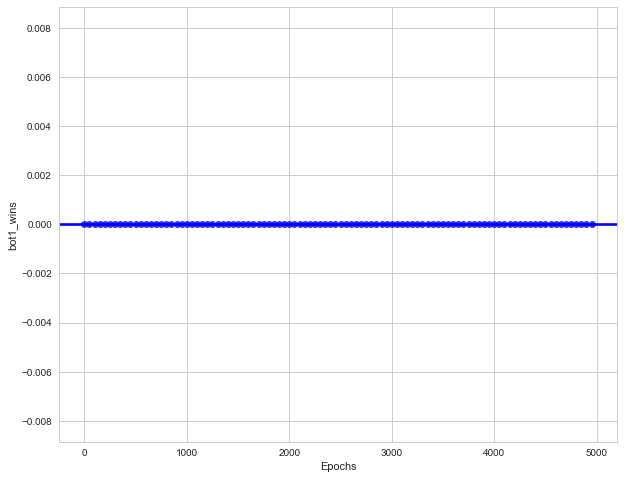

In [21]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(10,8))
ax = sns.regplot(data=win_trace_50_samples.reset_index(), x='index', y='bot1', color='b')
ax.set(xlabel='Epochs', ylabel='bot1_wins')
plt.show()

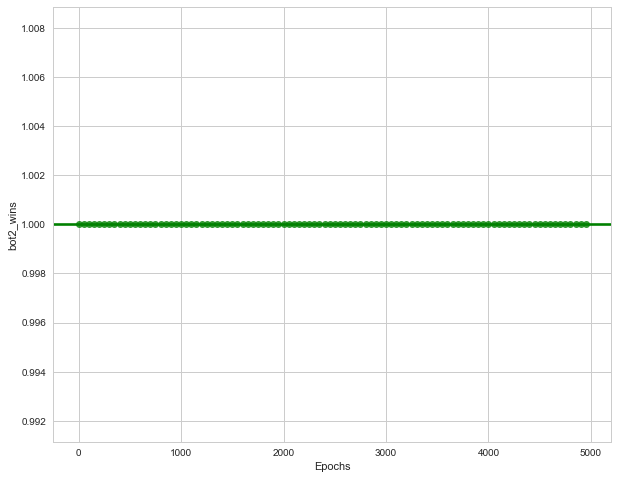

In [22]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(10,8))
ax = sns.regplot(data=win_trace_50_samples.reset_index(), x='index', y='bot2', color='g')
ax.set(xlabel='Epochs', ylabel='bot2_wins')
plt.show()